In [1]:
from pathlib import Path
from funman.api.run import Runner

%load_ext autoreload
%autoreload 2

In [8]:
# Setup Paths
RESOURCES = Path("../resources").resolve()
EXAMPLE_DIR = RESOURCES / "amr" / "petrinet" / "amr-examples"
MODEL_PATH = EXAMPLE_DIR / "sir.json"
REQUEST_PATH = EXAMPLE_DIR / "sir_request1.json"

request_dict = {
    # "query": {
    #     "variable": "I",
    #     "ub": 300
    # },
  "constraints": [
      # {
      #     "type": "compartmental",
      #   "bounds": [0, 1001],
      # },
      # { 
      #   "name": "I_bounds",
      #   "variable" : "I", 
      #   "bounds": {"lb":0.85, "ub":2},
      #   "timepoints": {"lb":1, "ub":2}
      #  },
      #   { 
      #   "name": "R_bounds",
      #   "variable" : "R", 
      #   "bounds": {"lb":0, "ub":1},
      #   "timepoints": {"lb":0, "ub":2}
      #  },
      #   { 
      #   "name": "S_bounds",
      #   "variable" : "S", 
      #   "bounds": {"lb":980, "ub":1000},
      #   "timepoints": {"lb":4, "ub":5}
      #  }
  ],
  "parameters": [
    {
      "name": "beta",
      "lb": 2.6e-7,
      "ub": 2.8e-7,
      "label": "all"
    },
    {
      "name": "gamma",
      "lb": 0.1,
      "ub": 0.18,
      "label": "all"
    },
    {
      "name": "S0",
      "lb": 1000,
      "ub": 1000,
      "label": "any"
    },
    {
      "name": "I0",
      "lb": 1,
      "ub": 1,
      "label": "any"
    },
    {
      "name": "R0",
      "lb": 0,
      "ub": 0,
      "label": "any"
    }
  ],
   "structure_parameters": [
        {
        "name": "num_steps",
        "lb": 40,
        "ub": 40,
        "label": "all"
        },
        {
        "name": "step_size",
        "lb": 1,
        "ub": 1,
        "label": "all"
        }
    ],
    "config": {
      "normalize": False,
      "tolerance": 1e-3,
      "simplify_query": False,
      # "use_compartmental_constraints" : False,
      # "profile": True
      # "save_smtlib" : True,
      # "substitute_subformulas": False
      "taylor_series_order": None
    }
}
    
# Use request_dict
results = Runner().run(MODEL_PATH, request_dict, description="Basic SIR with simple request", case_out_dir="./out")

# Use request file
# results = Runner().run(MODEL_PATH, REQUEST_PATH, description="Basic SIR with simple request", case_out_dir="./out")

INFO:funman.server.worker:FunmanWorker running...
INFO:funman.server.worker:Starting work on: ef145213-02a4-4d18-9e57-18f9e2e37f42
ERROR:/root/funman/src/funman/funman.py:funman.solve() exiting due to exception: 2 validation errors for ParameterConstraint
parameter.ModelParameter
  Input should be a valid dictionary or instance of ModelParameter [type=model_type, input_value=StructureParameter(name='...0, ub=40.0, label='any'), input_type=StructureParameter]
    For further information visit https://errors.pydantic.dev/2.3/v/model_type
parameter.StructureParameter
  Input should be a valid dictionary or instance of StructureParameter [type=model_type, input_value=StructureParameter(name='...0, ub=40.0, label='any'), input_type=StructureParameter]
    For further information visit https://errors.pydantic.dev/2.3/v/model_type
Traceback (most recent call last):
  File "/root/funman/src/funman/funman.py", line 64, in solve
    result = problem.solve(
  File "/root/funman/src/funman/scenari

Exception in thread Thread-14:
Traceback (most recent call last):
  File "/root/funman/src/funman/server/worker.py", line 240, in _run
    self.current_results.finalize_result(scenario, result)
  File "/root/funman/src/funman/server/query.py", line 200, in finalize_result
    raise Exception("No ParameterSpace for result")
Exception: No ParameterSpace for result

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/root/funman/src/funman/server/worker.py", line 243, in _run
    l.exception(
  File "/usr/lib/python3.8/logging/__init__.py", line 1481, in exception
    self.error(msg, *args, exc_info=exc_info, **kwargs)
  File "/usr/lib/python3.8/logging/__init__.py", line 1475, in error
    self._log(ERROR, msg, args, **kwargs)
TypeError: _log() got an unexpected keyword argument 'file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py

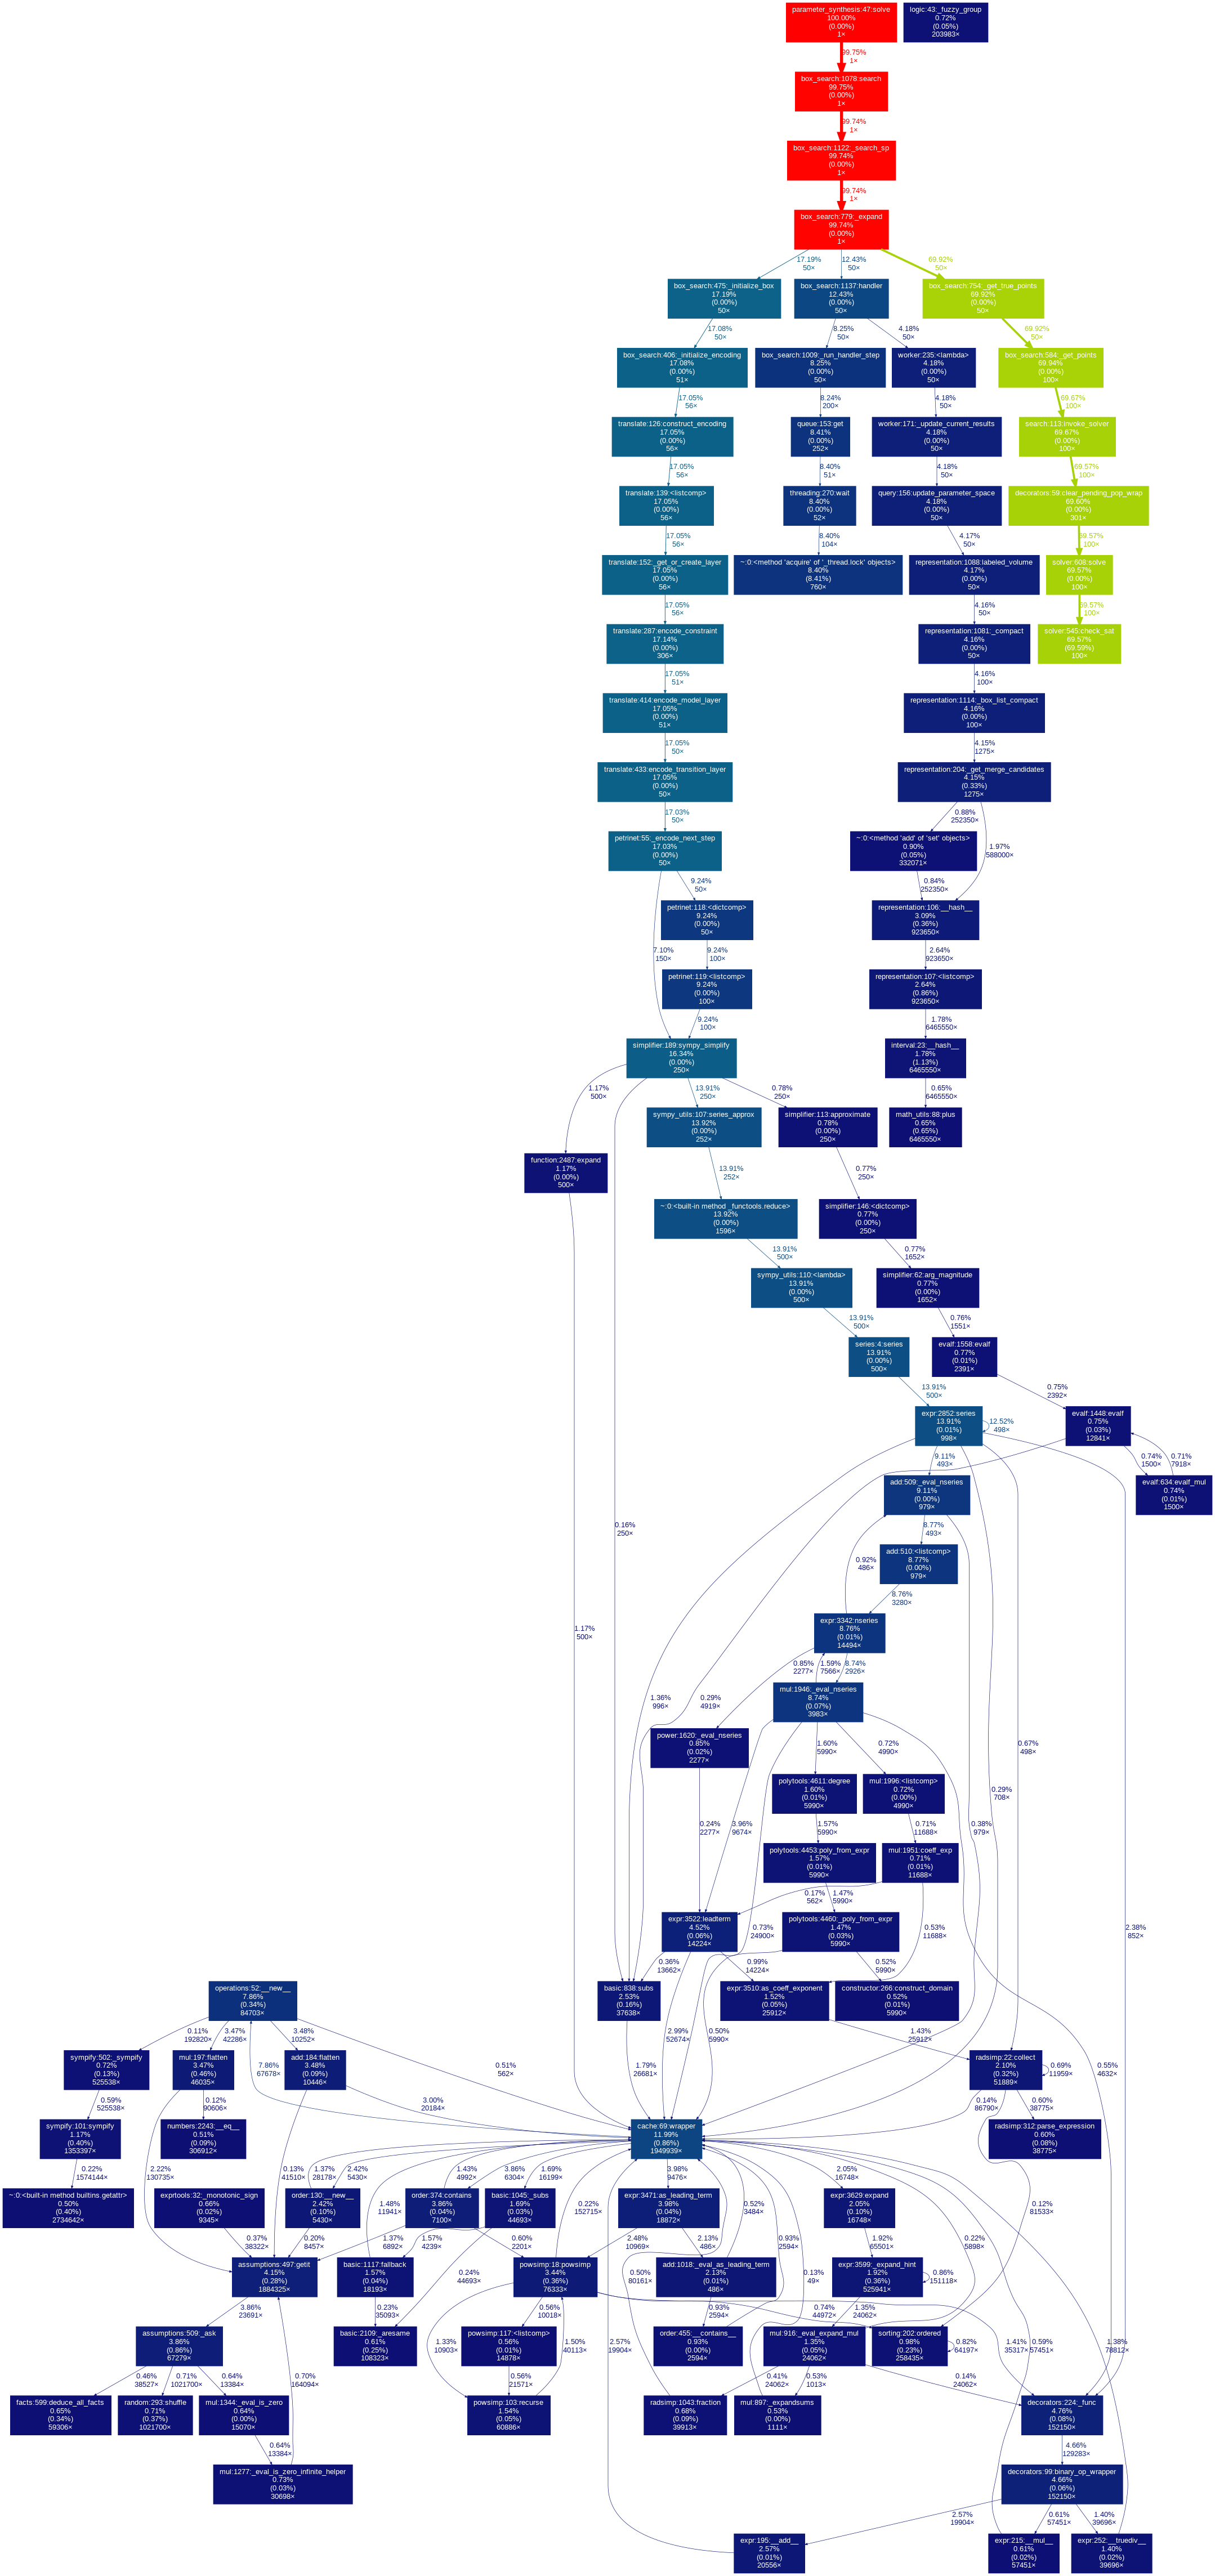

In [20]:
# View profiling if present
import os
from IPython.core.display import Image
from IPython.display import display
profile_file = os.path.join(f"/root/funman/notebooks/profile.stats")
if os.path.exists(profile_file):
    os.system(f"gprof2dot -f pstats {profile_file} | dot -Tpng -o profile.png")
    display(Image(filename='profile.png'))
else:
    print(f"{profile_file} file not present")

In [3]:
results.parameter_space.true_boxes, results.parameter_space.false_boxes

([{'type': 'box', 'label': 'true', 'bounds': {'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gamma': {'lb': 0.1, 'ub': 0.18000000000000002}, 'S0': {'lb': 1000.0, 'ub': 1000.0}, 'I0': {'lb': 1.0, 'ub': 1.0}, 'R0': {'lb': 0.0, 'ub': 0.0}, 'num_steps': {'lb': 1.0, 'ub': 1.0}, 'step_size': {'lb': 1.0, 'ub': 1.0}}, 'explanation': {'relevant_assumptions': [], 'expression': 'True'}},
  {'type': 'box', 'label': 'true', 'bounds': {'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gamma': {'lb': 0.1, 'ub': 0.18000000000000002}, 'S0': {'lb': 1000.0, 'ub': 1000.0}, 'I0': {'lb': 1.0, 'ub': 1.0}, 'R0': {'lb': 0.0, 'ub': 0.0}, 'num_steps': {'lb': 2.0, 'ub': 2.0}, 'step_size': {'lb': 1.0, 'ub': 1.0}}, 'explanation': {'relevant_assumptions': [], 'expression': 'True'}},
  {'type': 'box', 'label': 'true', 'bounds': {'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07}, 'gamma': {'lb': 0.1, 'ub': 0.18000000000000002}, 'S0': {'lb': 1000.0, 'ub': 1000.0}, 'I0': {'lb': 1.0, 'ub': 1.0}, 'R0': 

In [12]:
results.parameter_space.false_boxes[0].explain()

{'box': {'beta': {'lb': 2.6000000000000005e-07, 'ub': 2.8e-07},
  'gamma': {'lb': 0.16000000000000003, 'ub': 0.18000000000000002},
  'S0': {'lb': 1000.0, 'ub': 1000.0},
  'I0': {'lb': 1.0, 'ub': 1.0},
  'R0': {'lb': 0.0, 'ub': 0.0},
  'num_steps': {'lb': 2.0, 'ub': 20.0},
  'step_size': {'lb': 1.0, 'ub': 1.0}},
 'relevant_constraints': [{'name': 'I_bounds',
   'variable': 'I',
   'bounds': {'lb': 0.8500000000000001, 'ub': 2.0},
   'timepoints': {'lb': 1.0, 'ub': 2.0}},
  {'name': 'R_bounds',
   'variable': 'R',
   'bounds': {'lb': 0.0, 'ub': 1.0},
   'timepoints': {'lb': 0.0, 'ub': 2.0}}],
 'expression': '((((((((((((((((((gamma < 18000000000000003/100000000000000000) & (beta < (14000000000000001.0 * 1/50000000000000000000000))) & assume_R_bounds_1) & assume_I_bounds_1) & disj527) & disj528) & (R_1 = gamma)) & (I_1 = ((1.0 - gamma) + (1000.0 * beta)))) & (((((((((((gamma < 10000000000000001/100000000000000000) | (beta < (13000000000000003.0 * 1/50000000000000000000000))) | (R_1 < 0.0))

In [5]:
results.parameter_space.true_points[4].values

{'beta': 2.7e-07,
 'gamma': 0.1791822825534186,
 'S0': 1000.0,
 'I0': 1.0,
 'R0': 0.0,
 'timer_t_0': 0.0,
 'S_0': 1000.0,
 'I_0': 1.0,
 'R_0': 0.0,
 'S_1': 999.99973,
 'I_1': 0.8210875467602067,
 'R_1': 0.17918245323979334,
 'timer_t_1': 1.0,
 'S_2': 999.9995083067947,
 'I_2': 0.6741847606623893,
 'R_2': 0.3263069325429736,
 'timer_t_2': 2.0,
 'S_3': 999.9993262776,
 'I_3': 0.5592264115240427,
 'R_3': 0.4413561132168847,
 'timer_t_3': 3.0,
 'R_4': 0.5241998044231878,
 'timer_t_4': 4.0,
 'S_4': 999.9991752694514,
 'I_4': 0.47651237577273753,
 'S_5': 999.9990466119357,
 'I_5': 0.42579437796512504,
 'R_5': 0.575159010099256,
 'timer_t_5': 5.0,
 'step_size': 1.0,
 'num_steps': 5.0}

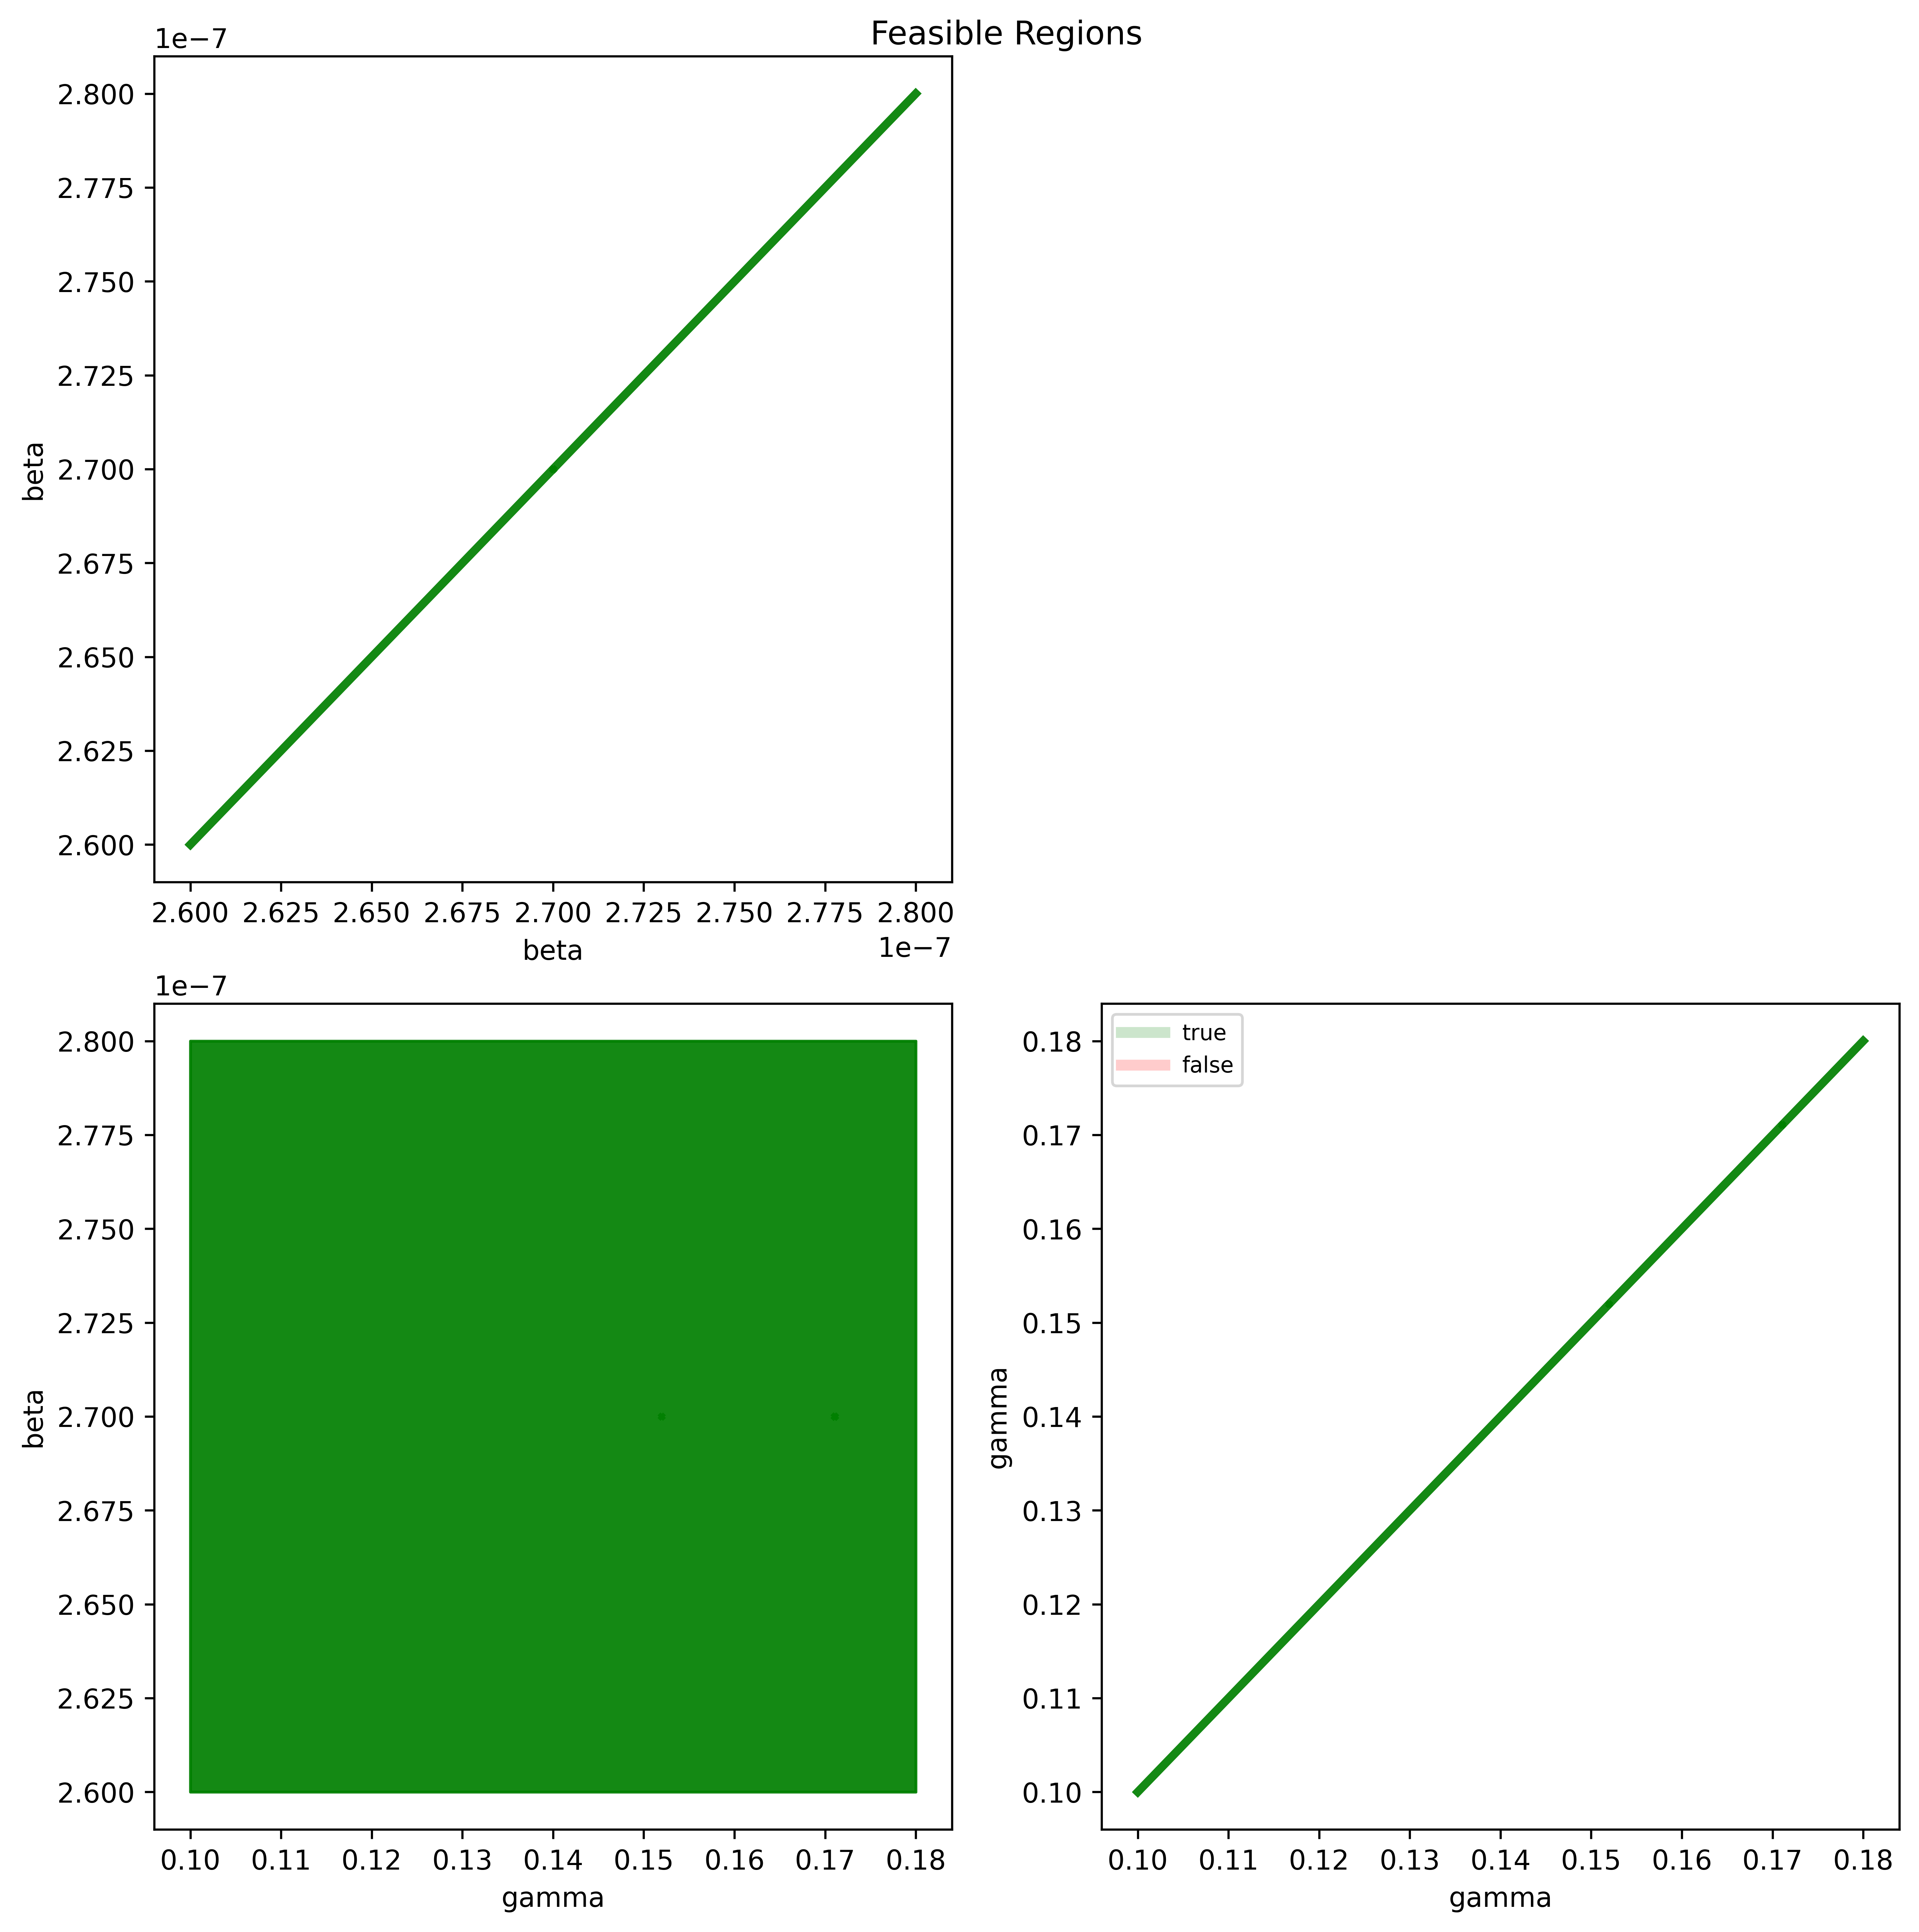

In [3]:
from funman_demo.parameter_space_plotter import ParameterSpacePlotter
ParameterSpacePlotter(
        results.parameter_space, plot_points=True, parameters=["beta", "gamma"]
    ).plot(show=False)

<Axes: xlabel='time'>

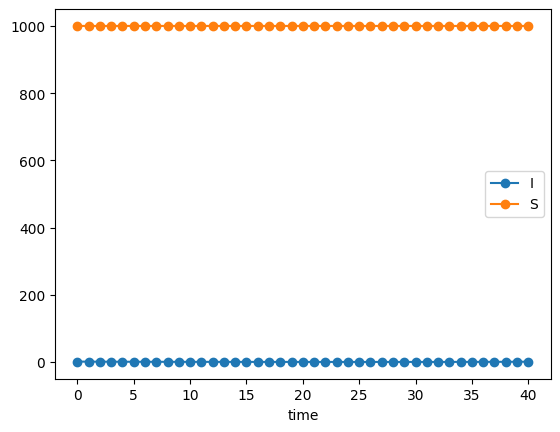

In [3]:
results.plot(variables=["I", "S"])

In [ ]:
((((((((((((((
     
     given (beta < (14000000000000001.0 * 1/50000000000000000000000)) & 
     given (gamma < 9/50)) & 
     assume_I_bounds_1) & 
     assume_R_bounds_1) & 
     disj6) & 
     (R_1 = gamma)) & 
     disj31) & 
     ((((((((beta < (13.0 * 1/50000000)) | (gamma < 10000000000000001/100000000000000000)) | (((1.0 + (1000.0 * beta)) - gamma) < 42499999999999999/50000000000000000)) | (R_1 < 0.0)) | (! (beta < (14000000000000001.0 * 1/50000000000000000000000)))) | (! (gamma < 9/50))) | (! (R_1 < 1.0))) | (! (R_1 = gamma)))) & 
     ((conj4 | (! assume_I_bounds_1)) | (! disj6))) & 
     ((R_1 < 1.0) | (! conj35))) & 
     ((conj35 | (! assume_R_bounds_1)) | (! disj31))) & 
     ((! conj4) | (! (((1.0 + (1000.0 * beta)) - gamma) < 42499999999999999/50000000000000000)))) & 
     ((! (R_1 < 0.0)) | (! conj35))) & 
     given (! (beta < (13.0 * 1/50000000)))) & 
     given (! (gamma < 10000000000000001/100000000000000000)))

In [ ]:
(! (beta < (13.0 * 1/50000000)))
(beta < (14000000000000001.0 * 1/50000000000000000000000))

(gamma < 9/50)
(! (gamma < 10000000000000001/100000000000000000))

(I_1 = ((1.0 - gamma) + (1000.0 * beta)))
((! (I_1 < 42499999999999999/50000000000000000)) | (! conj36))
((I_1 < 2.0) | (! conj36))